In [2]:
#EXP - supervised learning model
#Importing the required libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn import datasets
from sklearn import svm
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
# import the iris dataset
iris = datasets.load_iris()
x = iris.data
y = iris.target
# splitting X and y into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3,
random_state=1)
# GAUSSIAN NAIVE BAYES
gnb = GaussianNB()
# train the model
gnb.fit(x_train, y_train)
# make predictions
gnb_pred = gnb.predict(x_test)
# print the accuracy
print("---Gaussian Naive Bayes---")
print(f"Accuracy of Gaussian Naive Bayes: {accuracy_score(y_test, gnb_pred)}")
# print other performance metrics
print(f"Precision of Gaussian Naive Bayes: {precision_score(y_test, gnb_pred,average='weighted')}")
print(f"Recall of Gaussian Naive Bayes: {recall_score(y_test, gnb_pred,average='weighted')}")
print(f"F1-Score of Gaussian Naive Bayes: {f1_score(y_test, gnb_pred,average='weighted')}")


---Gaussian Naive Bayes---
Accuracy of Gaussian Naive Bayes: 0.9333333333333333
Precision of Gaussian Naive Bayes: 0.9352007469654529
Recall of Gaussian Naive Bayes: 0.9333333333333333
F1-Score of Gaussian Naive Bayes: 0.933615520282187


In [3]:
# DECISION TREE CLASSIFIER
dt = DecisionTreeClassifier(random_state=0)
# train the model
dt.fit(x_train, y_train)
# make predictions
dt_pred = dt.predict(x_test)
# print the accuracy
print("---Decision Tree Classifier---")
print(f"Accuracy of Decision Tree Classifier: {accuracy_score(y_test, dt_pred)}")
# print other performance metrics

---Decision Tree Classifier---
Accuracy of Decision Tree Classifier: 0.9555555555555556


In [6]:
# SUPPORT VECTOR MACHINE
svm_clf = svm.SVC(kernel='linear') # Linear Kernel
# train the model
svm_clf.fit(x_train, y_train)
# make predictions
svm_clf_pred = svm_clf.predict(x_test)
# print the accuracy
print("---Support Vector Machine---")
print(f"Accuracy of Support Vector Machine: {accuracy_score(y_test,svm_clf_pred)}")
# print other performance metrics
print(f"Precision of Support Vector Machine: {precision_score(y_test, svm_clf_pred,average='weighted')}")
print(f"Recall of Support Vector Machine: {recall_score(y_test, svm_clf_pred,average='weighted')}")
print(f"F1-Score of Support Vector Machine: {f1_score(y_test, svm_clf_pred,average='weighted')}")

---Support Vector Machine---
Accuracy of Support Vector Machine: 1.0
Precision of Support Vector Machine: 1.0
Recall of Support Vector Machine: 1.0
F1-Score of Support Vector Machine: 1.0


In [7]:
#EXP - RBFNN
import numpy as np
class RBFNN:
    def __init__(self, kernels,centers, beta=1,lr=0.1,epochs=80) -> None:
        self.kernels = kernels
        self.centers = centers
        self.beta = beta
        self.lr = lr
        self.epochs = epochs
        self.W = np.random.randn(kernels,1)
        self.b = np.random.randn(1,1)
# to save the errors evolution
# in case we want to check them later
        self.errors = []
# to save the gradients
# calculated by the network
# for verification reasons
        self.gradients = []
    def rbf_activation(self,x,center):
        return np.exp(-self.beta*np.linalg.norm(x - center)**2)
    def linear_activation(self,A):
        return self.W.T.dot(A) + self.b
    def least_square_error(self,pred,y):
        return (y - pred).flatten()**2
    def _forward_propagation(self,x):
        a1 = np.array([[self.rbf_activation(x,center)] for center in self.centers])
        a2 = self.linear_activation(a1)
        return a2, a1
    def _backpropagation(self, y, pred,a1):
# Back propagation
        dW = -(y - pred).flatten()*a1
        db = -(y - pred).flatten()
# Updating the weights
        self.W = self.W -self.lr*dW
        self.b = self.b -self.lr*db
        return dW, db
    def fit(self,X,Y):
        for _ in range(self.epochs):
            for x,y in list(zip(X,Y)):
# Forward propagation
                pred, a1 = self._forward_propagation(x)
                error = self.least_square_error(pred[0],y[0,np.newaxis])
                self.errors.append(error)
# Back propagation
                dW, db = self._backpropagation(y,pred,a1)
                self.gradients.append((dW,db))
    def predict(self,x):
        a2,a1 = self._forward_propagation(x)
        return 1 if np.squeeze(a2) >= 0.5 else 0
def main():
    x = np.array([[0,0], [0,1], [1,0], [1,1]])
    y = np.array([[0], [1], [1], [0]])
    rbf = RBFNN(kernels=2, centers=np.array([[0,1], [1,0]]), beta=1, lr= 0.1, epochs=80)
    rbf.fit(x, y)
    print(f"RBFN weights : {rbf.W}")
    print(f"RBFN bias : {rbf.b}")
    print()
    print("-- XOR Gate --")
    print(f"| 1 xor 1 : {rbf.predict(x[3])} |")
    print(f"| 0 xor 0 : {rbf.predict(x[0])} |")
    print(f"| 1 xor 0 : {rbf.predict(x[2])} |")
    print(f"| 0 xor 1 : {rbf.predict(x[1])} |")
    print("_______________")
if __name__ == "__main__":
    main()

RBFN weights : [[0.922878  ]
 [0.87056578]]
RBFN bias : [[-0.31380446]]

-- XOR Gate --
| 1 xor 1 : 0 |
| 0 xor 0 : 0 |
| 1 xor 0 : 1 |
| 0 xor 1 : 1 |
_______________


In [8]:
#EXP - implementing AND logic gate using perceptron model
# importing Python library
import numpy as np

# define Unit Step Function
def unitStep(v):
    if v >= 0:
        return 1
    else:
        return 0

# design Perceptron Model
def perceptronModel(x, w, b):
    v = np.dot(w, x) + b
    y = unitStep(v)
    return y

# AND Logic Function
# w1 = 1, w2 = 1, b = -1.5
def AND_logicFunction(x):
    w = np.array([1, 1])
    b = -1.5
    return perceptronModel(x, w, b)

# testing the Perceptron Model
test1 = np.array([0, 1])
test2 = np.array([1, 1])
test3 = np.array([0, 0])
test4 = np.array([1, 0])

print("AND({}, {}) = {}".format(0, 1, AND_logicFunction(test1)))
print("AND({}, {}) = {}".format(1, 1, AND_logicFunction(test2)))
print("AND({}, {}) = {}".format(0, 0, AND_logicFunction(test3)))
print("AND({}, {}) = {}".format(1, 0, AND_logicFunction(test4)))

AND(0, 1) = 0
AND(1, 1) = 1
AND(0, 0) = 0
AND(1, 0) = 0


In [9]:
#OR Gate
# importing Python library
import numpy as np

# define Unit Step Function
def unitStep(v):
    if v >= 0:
        return 1
    else:
        return 0

# design Perceptron Model
def perceptronModel(x, w, b):
    v = np.dot(w, x) + b
    y = unitStep(v)
    return y

# OR Logic Function
# w1 = 1, w2 = 1, b = -0.5
def OR_logicFunction(x):
    w = np.array([1, 1])
    b = -0.5
    return perceptronModel(x, w, b)

# testing the Perceptron Model
test1 = np.array([0, 1])
test2 = np.array([1, 1])
test3 = np.array([0, 0])
test4 = np.array([1, 0])

print("OR({}, {}) = {}".format(0, 1, OR_logicFunction(test1)))
print("OR({}, {}) = {}".format(1, 1, OR_logicFunction(test2)))
print("OR({}, {}) = {}".format(0, 0, OR_logicFunction(test3)))
print("OR({}, {}) = {}".format(1, 0, OR_logicFunction(test4)))

OR(0, 1) = 1
OR(1, 1) = 1
OR(0, 0) = 0
OR(1, 0) = 1


In [10]:
#EXP - NOT gate

# importing Python library
import numpy as np

# define Unit Step Function
def unitStep(v):
    if v >= 0:
        return 1
    else:
        return 0

# design Perceptron Model
def perceptronModel(x, w, b):
    v = np.dot(w, x) + b
    y = unitStep(v)
    return y

# NOT Logic Function
# w = -1, b = 0.5
def NOT_logicFunction(x):
    w = -1
    b = 0.5
    return perceptronModel(x, w, b)

# testing the Perceptron Model
test1 = np.array(1)
test2 = np.array(0)

print("NOT({}) = {}".format(1, NOT_logicFunction(test1)))
print("NOT({}) = {}".format(0, NOT_logicFunction(test2)))

NOT(1) = 0
NOT(0) = 1


In [11]:
import numpy as np
from sklearn import linear_model
X=np.array([3.78,2.44,2.09,0.14,1.72,1.65,4.92,4.37,4.96,4.52,3.69,5.88]).reshape(-1,1)
Y=np.array([0,0,0,0,0,0,1,1,1,1,1,1])
print(X)
logr=linear_model.LogisticRegression()
logr.fit(X,Y)
predicted=logr.predict(np.array([3.46]).reshape(-1,1))
print(predicted)

[[3.78]
 [2.44]
 [2.09]
 [0.14]
 [1.72]
 [1.65]
 [4.92]
 [4.37]
 [4.96]
 [4.52]
 [3.69]
 [5.88]]
[0]


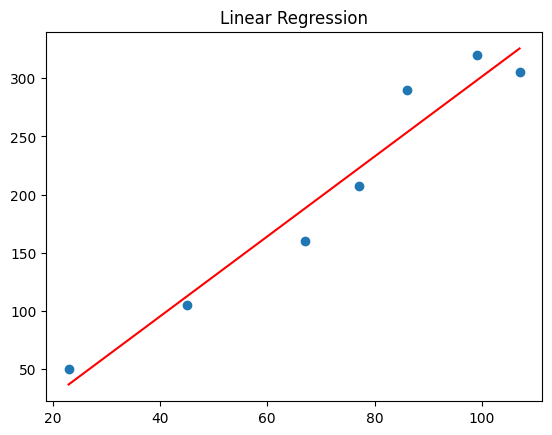

In [12]:
import matplotlib.pyplot as plt
from scipy import stats
x=[23,45,67,77,86,99,107]
y=[50,105,160,207,290,320,305]
slope, intercept, r, p, std_err=stats.linregress(x,y)
def myfun(x):
  return slope*x + intercept
mylabel=list(map(myfun,x))
plt.scatter(x,y)
plt.plot(x,mylabel, 'red')
plt.title('Linear Regression')
plt.show()

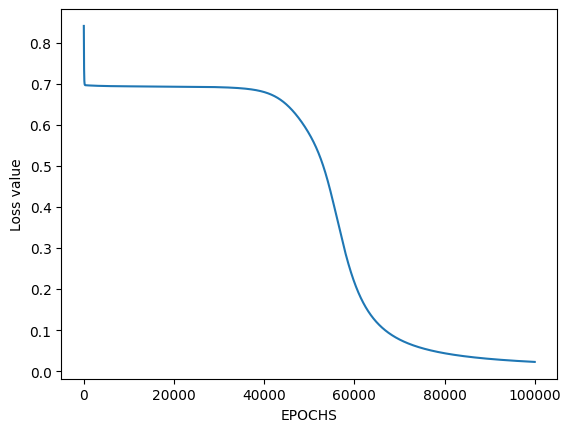

[[1. 0. 0. 1.]]


In [13]:
# exp :Implementation of XOR Gate using Multi-Layer Perceptron / Error Back
Propagation
# import Python Libraries
import numpy as np
from matplotlib import pyplot as plt

# Sigmoid Function
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# Initialization of the neural network parameters
# Initialized all the weights in the range of between 0 and 1
# Bias values are initialized to 0
def initializeParameters(inputFeatures, neuronsInHiddenLayers, outputFeatures):
    W1 = np.random.randn(neuronsInHiddenLayers, inputFeatures)
    W2 = np.random.randn(outputFeatures, neuronsInHiddenLayers)
    b1 = np.zeros((neuronsInHiddenLayers, 1))
    b2 = np.zeros((outputFeatures, 1))

    parameters = {"W1" : W1, "b1": b1,
                  "W2" : W2, "b2": b2}
    return parameters

# Forward Propagation
def forwardPropagation(X, Y, parameters):
    m = X.shape[1]
    W1 = parameters["W1"]
    W2 = parameters["W2"]
    b1 = parameters["b1"]
    b2 = parameters["b2"]

    Z1 = np.dot(W1, X) + b1
    A1 = sigmoid(Z1)
    Z2 = np.dot(W2, A1) + b2
    A2 = sigmoid(Z2)

    cache = (Z1, A1, W1, b1, Z2, A2, W2, b2)
    logprobs = np.multiply(np.log(A2), Y) + np.multiply(np.log(1 - A2), (1 - Y))
    cost = -np.sum(logprobs) / m
    return cost, cache, A2

# Backward Propagation
def backwardPropagation(X, Y, cache):
    m = X.shape[1]
    (Z1, A1, W1, b1, Z2, A2, W2, b2) = cache

    dZ2 = A2 - Y
    dW2 = np.dot(dZ2, A1.T) / m
    db2 = np.sum(dZ2, axis = 1, keepdims = True)

    dA1 = np.dot(W2.T, dZ2)
    dZ1 = np.multiply(dA1, A1 * (1- A1))
    dW1 = np.dot(dZ1, X.T) / m
    db1 = np.sum(dZ1, axis = 1, keepdims = True) / m

    gradients = {"dZ2": dZ2, "dW2": dW2, "db2": db2,
                 "dZ1": dZ1, "dW1": dW1, "db1": db1}
    return gradients

# Updating the weights based on the negative gradients
def updateParameters(parameters, gradients, learningRate):
    parameters["W1"] = parameters["W1"] - learningRate * gradients["dW1"]
    parameters["W2"] = parameters["W2"] - learningRate * gradients["dW2"]
    parameters["b1"] = parameters["b1"] - learningRate * gradients["db1"]
    parameters["b2"] = parameters["b2"] - learningRate * gradients["db2"]
    return parameters

# Model to learn the XOR truth table
X = np.array([[0, 0, 1, 1], [0, 1, 0, 1]]) # XOR input
Y = np.array([[0, 1, 1, 0]]) # XOR output

# Define model parameters
neuronsInHiddenLayers = 2 # number of hidden layer neurons (2)
inputFeatures = X.shape[0] # number of input features (2)
outputFeatures = Y.shape[0] # number of output features (1)
parameters = initializeParameters(inputFeatures, neuronsInHiddenLayers, outputFeatures)
epoch = 100000
learningRate = 0.01
losses = np.zeros((epoch, 1))

for i in range(epoch):
    losses[i, 0], cache, A2 = forwardPropagation(X, Y, parameters)
    gradients = backwardPropagation(X, Y, cache)
    parameters = updateParameters(parameters, gradients, learningRate)

# Evaluating the performance
plt.figure()
plt.plot(losses)
plt.xlabel("EPOCHS")
plt.ylabel("Loss value")
plt.show()

# Testing
X = np.array([[1, 1, 0, 0], [0, 1, 0, 1]]) # XOR input
cost, _, A2 = forwardPropagation(X, Y, parameters)
prediction = (A2 > 0.5) * 1.0
# print(A2)
print(prediction)

In [20]:
import numpy as np
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
class Perceptron:
  def _init__(self, num_inputs, learning_rate=0.01):
    self.weights = np.random.rand(num_inputs+1)
    self.learning_rate = learning_rate
  def linear(self, inputs):
    Z= inputs @ self.weights [1:].T ++ self.weights[0]
    return Z
  def Heaviside_step_fn(self,z):
    if z>=0:
      return 1
    else:
      return 0
  def predict(self, inputs):
    Z = self.linear(inputs)
    try:
      pred = []
      for z in Z:
        pred.append(self.Heaviside_step_fn(z))
    except:
      return self.Heaviside_step_fn(Z)
    return pred
#define the loss function
  def loss(self, prediction, target):
    loss = (prediction-target)
    return loss
  def train(self, inputs, target):
    prediction = self.predict(inputs)
    error = self.loss (prediction, target)
    self.weights[1:] += self.learning_rate * error*inputs
    self.weights[0] += self.learning_rate * error
  def fit(self,x,y, num_epochs):
    for epoch in range(num_epochs):
      for inputs, target in zip(x,y):
        self.train(inputs, target)
X,y = make_blobs (n_samples=1000,n_features=2,centers=2,cluster_std=3,random_state=23)
X_train, X_test, Y_train, y_test = train_test_split(X,y,test_size = 0.2,random_state=23,shuffle=True)
scaler =StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
np.random.seed(23)
perceptron = Perceptron(num_inputs=X_train.shape[1])
perceptron.fit(X_train, y_train, num_epochs=100)
pred =perceptron.predict(X_test)
accuracy = np.mean(pred!= y_test)
print("Accuracy:", accuracy)

TypeError: Perceptron() takes no arguments

TypeError: Perceptron() takes no arguments